## Supply Chain Management

#### OVERVIEW

A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business two
years back. Their higher management has noticed that there is a mismatch in the demand and
supply. Where the demand is high, supply is pretty low and vice-versa which results in a loss in
inventory cost and ultimately loss to the company. Hence, the higher management wants to
optimize the supply quantity in each and every warehouse in the entire country.
Create a model using : Train dataset

#### GOALS
The objective of this exercise is to build a model, using historical data that will determine an
optimum weight of the product to be shipped each time from the respective warehouse.
1. Focus on all steps of data science (EDA, data processing, model, evaluation, charts)
2. Highlight any trend in data, deep insight, novel steps that you take
3. Highlight next steps and improvements.
4. Apply 5 to 6 machine learning algorithms and evaluate it using Test dataset .

### ..............................

Importing Libraries and Train Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Train_Dataset=pd.read_csv("supply_train.csv")
Train_Dataset

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103


###  EDA & Data Pre-Processing

In [5]:
# Columns in Train Dataset

Train_Dataset.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [6]:
# Checking for Number of features in Train Dataset
Train_Dataset.shape[1]

25

Training Dataset is having 25 Features

In [7]:
# Data Types

Train_Dataset.dtypes

Unnamed: 0                        int64
Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64


Train Data Set Include both Numerical and Categorical Data

In [8]:
# Checking for any Null Values in Dataset

Train_Dataset.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

Figure Out Missing values in Number of Workers, Ware House Establishment Year and Approved Goverenment Certificate

##### Null Value in Workers Number

In [9]:
# Calculate the mean 'workers_num' for each unique 'WH_capacity_size'
mean_workers_by_capacity=Train_Dataset.groupby('WH_capacity_size')['workers_num'].mean()
mean_workers_by_capacity

WH_capacity_size
Large    29.009596
Mid      28.697609
Small    29.155410
Name: workers_num, dtype: float64

 Uses the groupby function to group the dataset by unique values in the 'WH_capacity_size' column. It then calculates the mean of the 'workers_num' for each group.The result is a Series (mean_workers_by_capacity) where the index is the unique 'WH_capacity_size' values, and the values are the corresponding mean 'workers_num'.

In [10]:
# Define a Function to Fill Missing 'workers_num' Values

def fill_workers_num(row):
    if pd.isnull(row['workers_num']):
        return mean_workers_by_capacity[row['WH_capacity_size']]
    else:
        return row['workers_num']

This function (fill_workers_num) is defined to take a row of the DataFrame as input. It checks if 'workers_num' is null (pd.isnull(row['workers_num'])). If it is null, the function returns the mean 'workers_num' value based on the 'WH_capacity_size' of that row; otherwise, it returns the original 'workers_num' value.

In [11]:
# Apply the Function to Fill Missing Values in 'workers_num'

Train_Dataset['workers_num'] = Train_Dataset.apply(fill_workers_num, axis=1)
Train_Dataset

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.00000,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.00000,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.00000,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.00000,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.00000,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.00000,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.00000,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.00000,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,29.15541,2007.0,16,0,A,5,15,21103


This code uses the apply function to apply the fill_workers_num function to each row of the DataFrame along axis 1 (row-wise). It fills the missing values in the 'workers_num' column with the mean values based on 'WH_capacity_size'.

##### Ware House Establishment Year

In [12]:
# Drop the 'wh_est_year' column
Train_Dataset.drop('wh_est_year', axis=1, inplace=True)
Train_Dataset


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,1,91,29.00000,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,0,1,210,31.00000,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,0,161,37.00000,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,0,103,21.00000,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,0,1,112,25.00000,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,0,240,19.00000,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,0,1,164,30.00000,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,0,1,211,24.00000,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,0,1,119,29.15541,16,0,A,5,15,21103


Dropping the 'wh_est_year' column is a decision based on the high percentage of missing values, the potential lack of relevance to the prediction task, and the desire to simplify the model. 

##### Approved Goverenment Certificate

In [13]:
# Impute null values with a new category 'Unknown'
Train_Dataset['approved_wh_govt_certificate'].fillna('Unknown', inplace=True)
Train_Dataset

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,1,91,29.00000,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,0,1,210,31.00000,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,0,161,37.00000,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,0,103,21.00000,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,0,1,112,25.00000,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,0,240,19.00000,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,0,1,164,30.00000,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,0,1,211,24.00000,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,0,1,119,29.15541,16,0,A,5,15,21103


Since we don't have sufficient information in the given dataset to make decisions about the 'Government Certificate' ('approved_wh_govt_certificate') category for instances where the original information is missing, a new category named 'Unknown' has been created. The code uses the fillna method to replace null values in the 'approved_wh_govt_certificate' column with the string 'Unknown'. Therefore, wherever the original 'approved_wh_govt_certificate' value is missing, it is replaced with 'Unknown'.

In [14]:
# Checking for any Null Values in Dataset

Train_Dataset.isnull().sum()

Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

We can conclude that there are no missing values in the dataset

In [15]:
Train_Dataset.drop("Unnamed: 0", axis=1, inplace=True)
Train_Dataset

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,1,91,29.00000,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,0,1,210,31.00000,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,0,161,37.00000,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,0,103,21.00000,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,0,1,112,25.00000,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,4779,...,0,0,240,19.00000,14,0,B+,5,23,16094
16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,5718,...,0,1,164,30.00000,17,0,B+,6,24,21113
16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,4514,...,0,1,211,24.00000,24,1,B,5,29,28117
16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,5829,...,0,1,119,29.15541,16,0,A,5,15,21103


Removing a Column Unnamd which is not relevent for Modal Creation

In [16]:
# Remove the "WH_" prefix from the warehouse IDs

Train_Dataset['Ware_house_ID'] = Train_Dataset['Ware_house_ID'].str.replace('WH_', '').astype('int64')
Train_Dataset

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,1,91,29.00000,13,0,A,5,15,17115
1,100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,0,1,210,31.00000,4,0,A,3,17,5074
2,100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,0,161,37.00000,17,0,A,6,22,23137
3,100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,0,103,21.00000,17,1,A+,3,27,22115
4,100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,0,1,112,25.00000,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,4779,...,0,0,240,19.00000,14,0,B+,5,23,16094
16616,116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,5718,...,0,1,164,30.00000,17,0,B+,6,24,21113
16617,116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,4514,...,0,1,211,24.00000,24,1,B,5,29,28117
16618,116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,5829,...,0,1,119,29.15541,16,0,A,5,15,21103


Each value in the "Ware_house_ID" series to remove the "WH_" prefix and converterd to integers

In [17]:
# Remove the "EID_" prefix from the WH_Manager_ID

Train_Dataset['WH_Manager_ID'] = Train_Dataset['WH_Manager_ID'].str.replace('EID_', '').astype('int64')
Train_Dataset

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,100000,50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,1,91,29.00000,13,0,A,5,15,17115
1,100001,50001,Rural,Large,North,Zone 5,0,0,4,6217,...,0,1,210,31.00000,4,0,A,3,17,5074
2,100002,50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,0,161,37.00000,17,0,A,6,22,23137
3,100003,50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,0,103,21.00000,17,1,A+,3,27,22115
4,100004,50004,Rural,Large,North,Zone 5,3,1,2,4740,...,0,1,112,25.00000,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,116615,66615,Urban,Large,West,Zone 6,3,1,6,4779,...,0,0,240,19.00000,14,0,B+,5,23,16094
16616,116616,66616,Urban,Large,North,Zone 5,2,0,2,5718,...,0,1,164,30.00000,17,0,B+,6,24,21113
16617,116617,66617,Rural,Large,North,Zone 6,5,0,4,4514,...,0,1,211,24.00000,24,1,B,5,29,28117
16618,116618,66618,Rural,Small,West,Zone 6,3,2,3,5829,...,0,1,119,29.15541,16,0,A,5,15,21103


Each value in the "Ware_house_ID" series to remove the "WH_" prefix and converterd to integers

## Numerical Features

In [18]:
# Identify numerical features
numerical_features = Train_Dataset.select_dtypes(include=['int64', 'float64']).columns
print("Numerical features in the Given Data Set are: \n",numerical_features)

Numerical features in the Given Data Set are: 
 Index(['Ware_house_ID', 'WH_Manager_ID', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')


In [19]:
# Calculate Correlation with Correlation Matrix
correlation_matrix = Train_Dataset[numerical_features].corr()

#Correlation between target variable (optimum weight) and other features

correlation_with_target = correlation_matrix['product_wg_ton'].sort_values(ascending=False)

# Print the correlation values
print("Correlation with 'product_wg_ton':")
print(correlation_with_target)

Correlation with 'product_wg_ton':
product_wg_ton                1.000000
storage_issue_reported_l3m    0.986716
wh_breakdown_l3m              0.345474
temp_reg_mach                 0.101912
Competitor_in_mkt             0.010854
WH_Manager_ID                 0.002573
Ware_house_ID                 0.002573
distributor_num               0.001435
flood_impacted               -0.000507
num_refill_req_l3m           -0.000646
electric_supply              -0.001533
flood_proof                  -0.003862
workers_num                  -0.005872
govt_check_l3m               -0.007359
retail_shop_num              -0.008332
dist_from_hub                -0.011380
transport_issue_l1y          -0.183150
Name: product_wg_ton, dtype: float64


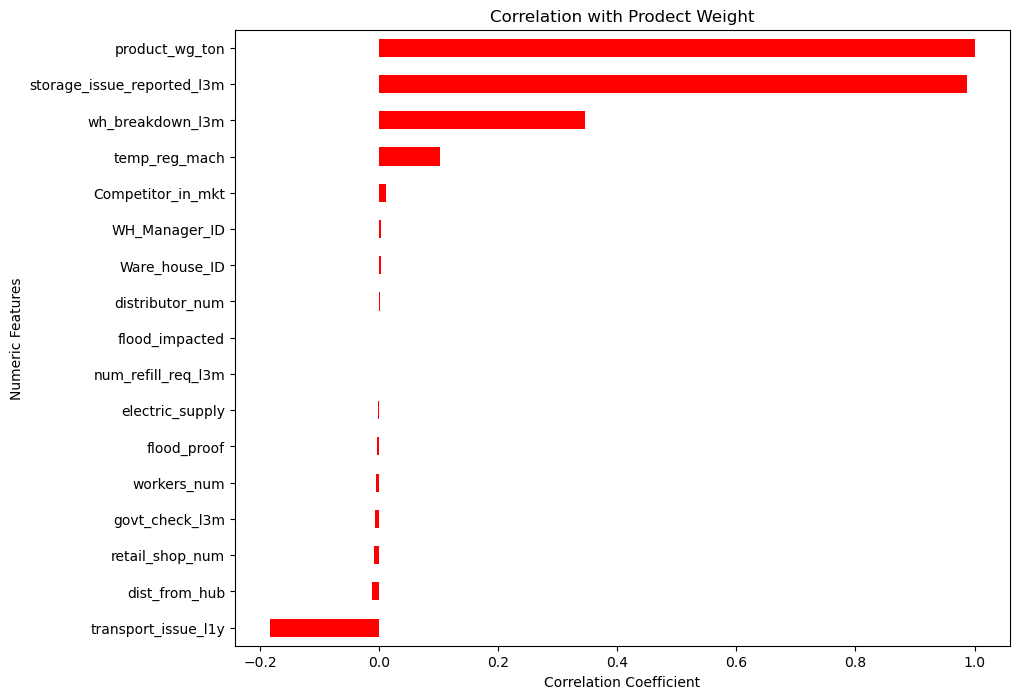

In [20]:
# Visualizing correlations with 'product_wg_ton'
correlation_with_target = correlation_with_target.sort_values()
correlation_with_target.plot(kind='barh', figsize=(10, 8), color='red')
plt.title('Correlation with Prodect Weight')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Numeric Features')
plt.show()

The primary purpose of correlation analysis is to identify and understand the strength and direction of linear relationships between numerical variables. The  horizontal bar chart allows for a quick and visual interpretation of the correlation matrix.The correlation values range from -1 to 1, where:

1 indicates a perfect positive correlation
-1 indicates a perfect negative correlation and
0 indicates no linear correlation.


Positive Correlation:
There is a strong positive correlation (0.987) between the reported storage issues in the last 3 months and the optimum weight of the product. This indicates that an increase in reported storage issues corresponds to an increase in product weight. Additionally, a moderate positive correlation (0.345) is observed with the number of breakdowns in the warehouse in the last 3 months, suggesting a connection between warehouse breakdowns and product weight. A weak positive correlation (0.102) is found with the presence of a temperature regulating machine in the warehouse. Lastly, a very weak positive correlation (0.011) exists with the number of competitors in the market.

Negative Correlation:
There is a moderate negative correlation (-0.183) with the number of transport issues for the warehouse in the last year. This implies that a higher number of transport issues correlates with a decrease in product weight. A weak negative correlation (-0.011) is identified with the distance from the warehouse to the production hub, indicating a slight decrease in product weight as the distance increases. Furthermore, there are very weak negative correlations with the number of retail shops selling the product (-0.008), the number of government checks in the last 3 months (-0.007), flood-proof indicator (-0.004), electric supply (-0.002), the number of workers in the warehouse (-0.006).

Weak Correlation:
flood-impacted, the number of refill requests have correlations close to zero. that means no impact to product_wg_ton.

In [21]:
# Drop Weak Correlation
columns_to_drop = ['flood_impacted']
Train_Dataset.drop(columns=columns_to_drop, inplace=True)
Train_Dataset

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,100000,50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,1,91,29.00000,13,0,A,5,15,17115
1,100001,50001,Rural,Large,North,Zone 5,0,0,4,6217,...,0,1,210,31.00000,4,0,A,3,17,5074
2,100002,50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,0,161,37.00000,17,0,A,6,22,23137
3,100003,50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,0,103,21.00000,17,1,A+,3,27,22115
4,100004,50004,Rural,Large,North,Zone 5,3,1,2,4740,...,0,1,112,25.00000,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,116615,66615,Urban,Large,West,Zone 6,3,1,6,4779,...,0,0,240,19.00000,14,0,B+,5,23,16094
16616,116616,66616,Urban,Large,North,Zone 5,2,0,2,5718,...,0,1,164,30.00000,17,0,B+,6,24,21113
16617,116617,66617,Rural,Large,North,Zone 6,5,0,4,4514,...,0,1,211,24.00000,24,1,B,5,29,28117
16618,116618,66618,Rural,Small,West,Zone 6,3,2,3,5829,...,0,1,119,29.15541,16,0,A,5,15,21103


Dropped Flood Impacted feature since this not having impact on product weight but we keep number of refill request since it might me needed in the future 

In [22]:
Train_Dataset.dtypes

Ware_house_ID                     int64
WH_Manager_ID                     int64
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64
dtype: object

In [24]:
# Convert 'workers_num' column from float to int64
Train_Dataset['workers_num'] = Train_Dataset['workers_num'].astype('int64')
Train_Dataset

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,100000,50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,1,91,29,13,0,A,5,15,17115
1,100001,50001,Rural,Large,North,Zone 5,0,0,4,6217,...,0,1,210,31,4,0,A,3,17,5074
2,100002,50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,0,161,37,17,0,A,6,22,23137
3,100003,50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,0,103,21,17,1,A+,3,27,22115
4,100004,50004,Rural,Large,North,Zone 5,3,1,2,4740,...,0,1,112,25,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,116615,66615,Urban,Large,West,Zone 6,3,1,6,4779,...,0,0,240,19,14,0,B+,5,23,16094
16616,116616,66616,Urban,Large,North,Zone 5,2,0,2,5718,...,0,1,164,30,17,0,B+,6,24,21113
16617,116617,66617,Rural,Large,North,Zone 6,5,0,4,4514,...,0,1,211,24,24,1,B,5,29,28117
16618,116618,66618,Rural,Small,West,Zone 6,3,2,3,5829,...,0,1,119,29,16,0,A,5,15,21103


This code will convert the 'workers_num' column to integer type (int64). Therefore, after implementing the code to convert the 'workers_num' column from float to int64, all decimal points will be truncated, and the values will become whole numbers.

In [25]:
# Checking DataType
Train_Dataset.dtypes

Ware_house_ID                    int64
WH_Manager_ID                    int64
Location_type                   object
WH_capacity_size                object
zone                            object
WH_regional_zone                object
num_refill_req_l3m               int64
transport_issue_l1y              int64
Competitor_in_mkt                int64
retail_shop_num                  int64
wh_owner_type                   object
distributor_num                  int64
flood_proof                      int64
electric_supply                  int64
dist_from_hub                    int64
workers_num                      int64
storage_issue_reported_l3m       int64
temp_reg_mach                    int64
approved_wh_govt_certificate    object
wh_breakdown_l3m                 int64
govt_check_l3m                   int64
product_wg_ton                   int64
dtype: object

### Categorical Features

In [26]:
# Select columns with non-numeric data types

categorical_features = Train_Dataset.select_dtypes(include=['object']).columns.tolist()
categorical_features

['Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

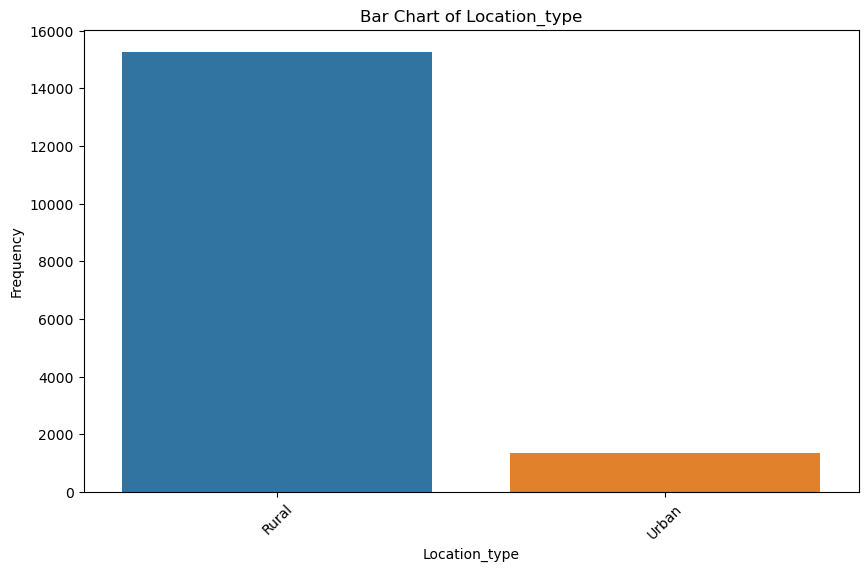

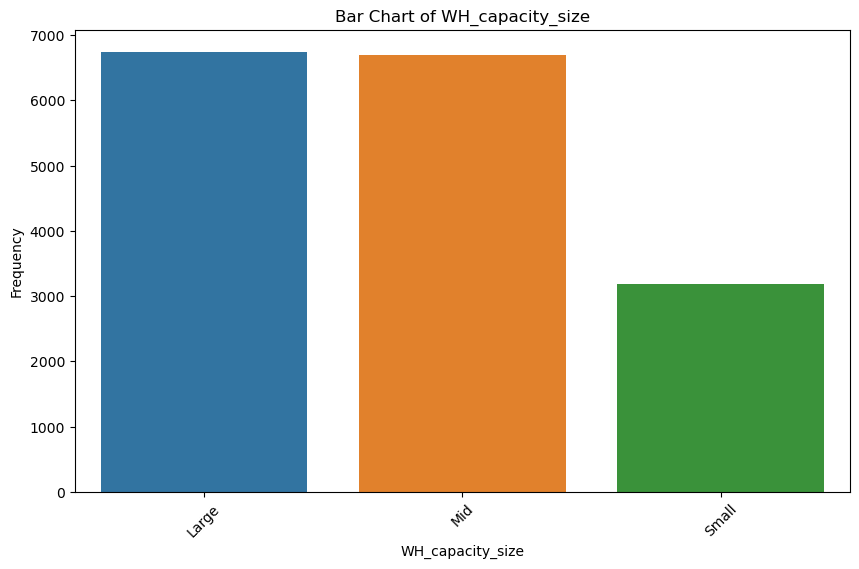

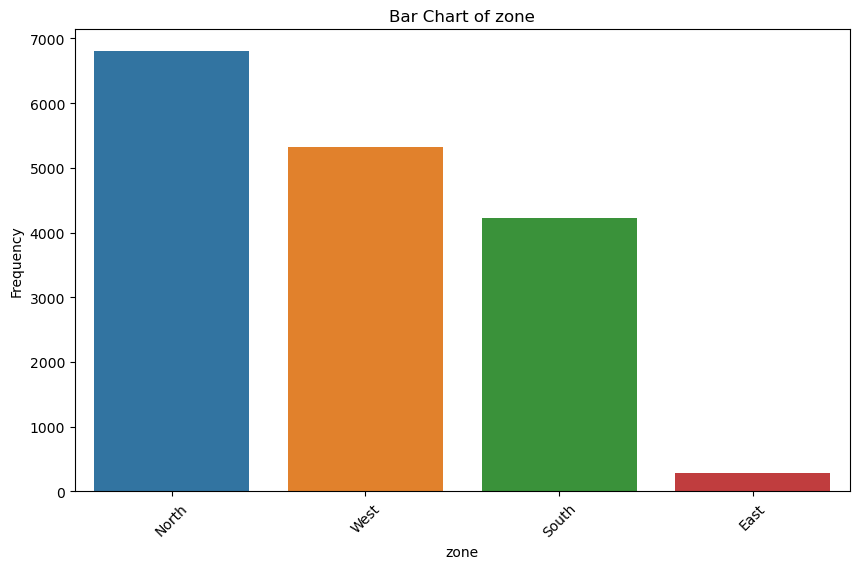

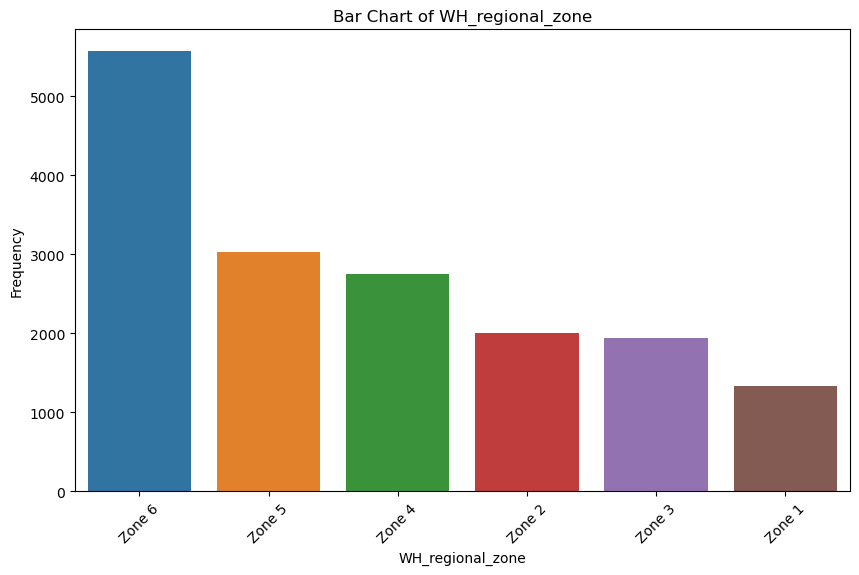

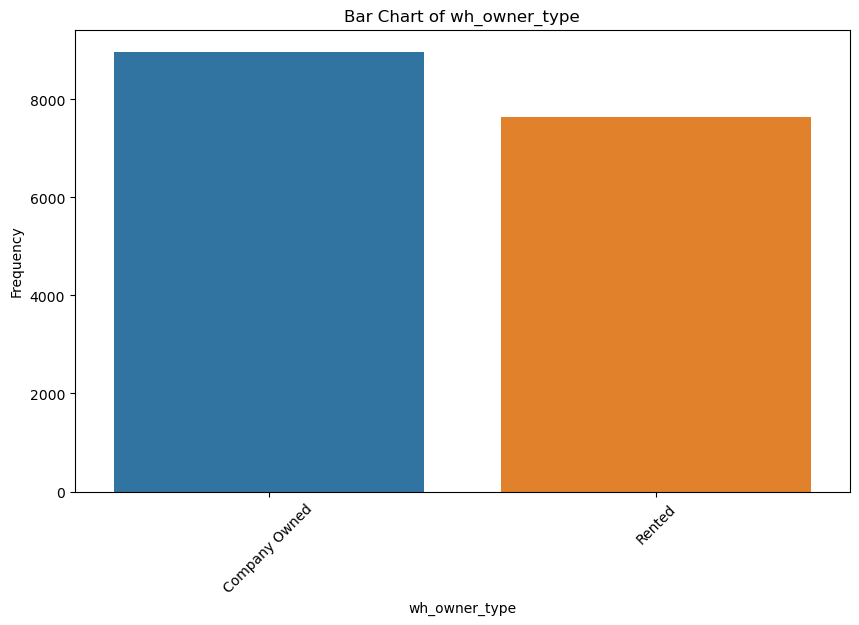

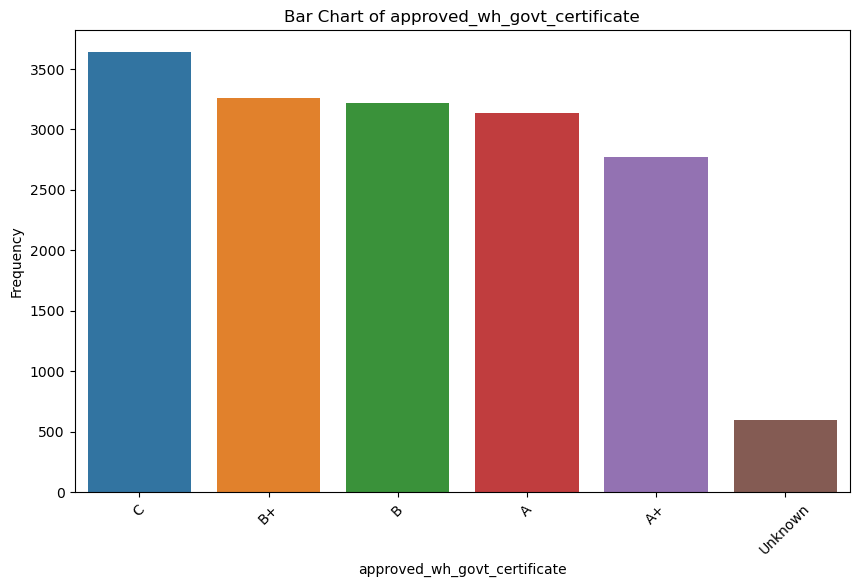

In [27]:
# Iterate over each categorical column and create a bar chart
for column in categorical_features:
    # Count the frequency of each category in the column
    category_counts = Train_Dataset[column].value_counts()
    
    # Create bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values)
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45) 
    plt.show()

This code will loop through each of the specified categorical columns, count the frequency of each category, and generate a bar chart showing the distribution of categories within each column. 

The categorical analysis reveals that most warehouses are located in rural areas, with a preference for small-sized facilities. The majority are situated in the north zone, and are owned by the company. Additionally, a significant portion of warehouses possess the 'C' certification. These insights provide valuable information about the distribution and ownership patterns of warehouses in the company's network

#### Encoding categorical variables

Encoding categorical variables is a crucial preprocessing step in preparing data for machine learning algorithms. Categorical variables, which represent qualitative attributes with discrete categories, need to be converted into numerical format as most machine learning algorithms work with numerical data. Two common techniques for encoding categorical variables are One-Hot Encoding and Label Encoding.

One-Hot Encoding involves creating binary columns for each category present in the categorical variable. Each category is represented by a binary column, where a value of 1 indicates the presence of the category, and 0 indicates absence. This technique ensures that each category is represented independently, avoiding any ordinal relationship between categories. One-hot encoding is useful when the categories do not have a natural order or hierarchy.

Label Encoding, on the other hand, maps each category to a unique integer. Each category is assigned a unique numerical value, effectively converting categorical data into ordinal data. While label encoding is simpler and more space-efficient than one-hot encoding, it may introduce unintended ordinal relationships between categories, which could mislead the machine learning algorithm. Therefore, label encoding is generally suitable for categorical variables with ordinal relationships, such as ordinal categorical variables with clear ordering.

##### One-Hot Encoding and Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# Perform Label Encoding

label_encoder = LabelEncoder()
for col in categorical_features:
    Train_Dataset[col] = label_encoder.fit_transform(Train_Dataset[col])


# Display the encoded datasets
print("Label Encoded Dataset:")
print(Train_Dataset.head())

Label Encoded Dataset:
   Ware_house_ID  WH_Manager_ID  Location_type  WH_capacity_size  zone  \
0         100000          50000              1                 2     3   
1         100001          50001              0                 0     1   
2         100002          50002              0                 1     2   
3         100003          50003              0                 1     1   
4         100004          50004              0                 0     1   

   WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0                 5                   3                    1   
1                 4                   0                    0   
2                 1                   1                    0   
3                 2                   7                    4   
4                 4                   3                    1   

   Competitor_in_mkt  retail_shop_num  ...  flood_proof  electric_supply  \
0                  2             4651  ...            1                

In [29]:
Train_Dataset

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,100000,50000,1,2,3,5,3,1,2,4651,...,1,1,91,29,13,0,0,5,15,17115
1,100001,50001,0,0,1,4,0,0,4,6217,...,0,1,210,31,4,0,0,3,17,5074
2,100002,50002,0,1,2,1,1,0,4,4306,...,0,0,161,37,17,0,0,6,22,23137
3,100003,50003,0,1,1,2,7,4,2,6000,...,0,0,103,21,17,1,1,3,27,22115
4,100004,50004,0,0,1,4,3,1,2,4740,...,0,1,112,25,18,0,4,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,116615,66615,1,0,3,5,3,1,6,4779,...,0,0,240,19,14,0,3,5,23,16094
16616,116616,66616,1,0,1,4,2,0,2,5718,...,0,1,164,30,17,0,3,6,24,21113
16617,116617,66617,0,0,1,5,5,0,4,4514,...,0,1,211,24,24,1,2,5,29,28117
16618,116618,66618,0,2,3,5,3,2,3,5829,...,0,1,119,29,16,0,0,5,15,21103


### TESTING DATASET Preprocessing

In [30]:
#load Test Dataset
Test_Dataset=pd.read_csv('supply_test.csv')

Test_Dataset

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
5525,22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,...,0,170,NaN,NaN,26,0,C,5,9,33108
5526,22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,...,0,99,22.0,NaN,20,0,B+,6,4,24072
5527,22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,...,0,220,17.0,NaN,13,0,B,3,28,15055


In [31]:
#Dropping Unnamed: 0 Column

testcolumns_to_drop = ['Unnamed: 0','flood_impacted','wh_est_year']
Test_Dataset.drop(columns=testcolumns_to_drop,inplace=True)

# Remove the "WH_" prefix from the warehouse IDs
Test_Dataset['Ware_house_ID'] = Test_Dataset['Ware_house_ID'].str.replace('WH_', '').astype('int64')

# Remove the "EID_" prefix from the WH_Manager_ID

Test_Dataset['WH_Manager_ID'] = Test_Dataset['WH_Manager_ID'].str.replace('EID_', '').astype('int64')


Test_Dataset

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,116621,66621,Rural,Large,North,Zone 5,5,0,3,5590,...,0,0,156,30.0,24,0,A,2,5,30132
1,116622,66622,Rural,Large,North,Zone 5,5,0,2,5856,...,0,1,79,31.0,5,1,C,2,24,6075
2,116623,66623,Rural,Small,North,Zone 6,3,0,3,4803,...,0,1,70,41.0,19,1,A+,5,9,24076
3,116624,66624,Rural,Mid,West,Zone 4,5,2,2,4784,...,0,1,255,33.0,9,1,A+,3,11,13092
4,116625,66625,Urban,Mid,North,Zone 4,6,0,4,3699,...,0,0,205,20.0,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,122145,72145,Rural,Large,North,Zone 6,8,1,3,5030,...,0,1,203,28.0,22,1,A+,2,4,29138
5525,122146,72146,Rural,Small,South,Zone 6,3,1,3,4320,...,0,0,170,NaN,26,0,C,5,9,33108
5526,122147,72147,Rural,Large,North,Zone 6,7,2,2,5268,...,0,0,99,22.0,20,0,B+,6,4,24072
5527,122148,72148,Rural,Large,North,Zone 6,6,2,4,4378,...,0,0,220,17.0,13,0,B,3,28,15055


In [32]:
#Null Values

Test_Dataset.isnull().sum()

Ware_house_ID                     0
WH_Manager_ID                     0
Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                     210
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate    206
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

Null Values in workers_num, wh_est_year, approved_wh_govt_certificate

In [33]:
# Impute null values with a new category 'Unknown'
Test_Dataset['approved_wh_govt_certificate'].fillna('Unknown', inplace=True)


Test_Dataset

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,116621,66621,Rural,Large,North,Zone 5,5,0,3,5590,...,0,0,156,30.0,24,0,A,2,5,30132
1,116622,66622,Rural,Large,North,Zone 5,5,0,2,5856,...,0,1,79,31.0,5,1,C,2,24,6075
2,116623,66623,Rural,Small,North,Zone 6,3,0,3,4803,...,0,1,70,41.0,19,1,A+,5,9,24076
3,116624,66624,Rural,Mid,West,Zone 4,5,2,2,4784,...,0,1,255,33.0,9,1,A+,3,11,13092
4,116625,66625,Urban,Mid,North,Zone 4,6,0,4,3699,...,0,0,205,20.0,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,122145,72145,Rural,Large,North,Zone 6,8,1,3,5030,...,0,1,203,28.0,22,1,A+,2,4,29138
5525,122146,72146,Rural,Small,South,Zone 6,3,1,3,4320,...,0,0,170,NaN,26,0,C,5,9,33108
5526,122147,72147,Rural,Large,North,Zone 6,7,2,2,5268,...,0,0,99,22.0,20,0,B+,6,4,24072
5527,122148,72148,Rural,Large,North,Zone 6,6,2,4,4378,...,0,0,220,17.0,13,0,B,3,28,15055


In [34]:
# Calculate the mean 'workers_num' for each unique 'WH_capacity_size'
mean_workers_by_capacity=Test_Dataset.groupby('WH_capacity_size')['workers_num'].mean()
mean_workers_by_capacity

# Define a Function to Fill Missing 'workers_num' Values

def fill_workers_num(row):
    if pd.isnull(row['workers_num']):
        return mean_workers_by_capacity[row['WH_capacity_size']]
    else:
        return row['workers_num']
    
# Apply the Function to Fill Missing Values in 'workers_num'

Test_Dataset['workers_num'] = Test_Dataset.apply(fill_workers_num, axis=1)

Test_Dataset

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,116621,66621,Rural,Large,North,Zone 5,5,0,3,5590,...,0,0,156,30.000000,24,0,A,2,5,30132
1,116622,66622,Rural,Large,North,Zone 5,5,0,2,5856,...,0,1,79,31.000000,5,1,C,2,24,6075
2,116623,66623,Rural,Small,North,Zone 6,3,0,3,4803,...,0,1,70,41.000000,19,1,A+,5,9,24076
3,116624,66624,Rural,Mid,West,Zone 4,5,2,2,4784,...,0,1,255,33.000000,9,1,A+,3,11,13092
4,116625,66625,Urban,Mid,North,Zone 4,6,0,4,3699,...,0,0,205,20.000000,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,122145,72145,Rural,Large,North,Zone 6,8,1,3,5030,...,0,1,203,28.000000,22,1,A+,2,4,29138
5525,122146,72146,Rural,Small,South,Zone 6,3,1,3,4320,...,0,0,170,28.915157,26,0,C,5,9,33108
5526,122147,72147,Rural,Large,North,Zone 6,7,2,2,5268,...,0,0,99,22.000000,20,0,B+,6,4,24072
5527,122148,72148,Rural,Large,North,Zone 6,6,2,4,4378,...,0,0,220,17.000000,13,0,B,3,28,15055


In [35]:
Train_Dataset.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [36]:
# Checking the Datatypes
Test_Dataset.dtypes

Ware_house_ID                     int64
WH_Manager_ID                     int64
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64
dtype: object

In [37]:
Test_Dataset['workers_num'] = Test_Dataset['workers_num'].astype('int64')
Test_Dataset

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,116621,66621,Rural,Large,North,Zone 5,5,0,3,5590,...,0,0,156,30,24,0,A,2,5,30132
1,116622,66622,Rural,Large,North,Zone 5,5,0,2,5856,...,0,1,79,31,5,1,C,2,24,6075
2,116623,66623,Rural,Small,North,Zone 6,3,0,3,4803,...,0,1,70,41,19,1,A+,5,9,24076
3,116624,66624,Rural,Mid,West,Zone 4,5,2,2,4784,...,0,1,255,33,9,1,A+,3,11,13092
4,116625,66625,Urban,Mid,North,Zone 4,6,0,4,3699,...,0,0,205,20,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,122145,72145,Rural,Large,North,Zone 6,8,1,3,5030,...,0,1,203,28,22,1,A+,2,4,29138
5525,122146,72146,Rural,Small,South,Zone 6,3,1,3,4320,...,0,0,170,28,26,0,C,5,9,33108
5526,122147,72147,Rural,Large,North,Zone 6,7,2,2,5268,...,0,0,99,22,20,0,B+,6,4,24072
5527,122148,72148,Rural,Large,North,Zone 6,6,2,4,4378,...,0,0,220,17,13,0,B,3,28,15055


In [38]:
Test_Dataset.dtypes

Ware_house_ID                    int64
WH_Manager_ID                    int64
Location_type                   object
WH_capacity_size                object
zone                            object
WH_regional_zone                object
num_refill_req_l3m               int64
transport_issue_l1y              int64
Competitor_in_mkt                int64
retail_shop_num                  int64
wh_owner_type                   object
distributor_num                  int64
flood_proof                      int64
electric_supply                  int64
dist_from_hub                    int64
workers_num                      int64
storage_issue_reported_l3m       int64
temp_reg_mach                    int64
approved_wh_govt_certificate    object
wh_breakdown_l3m                 int64
govt_check_l3m                   int64
product_wg_ton                   int64
dtype: object

In [39]:
### Categorical Features

# Select columns with non-numeric data types

test_categorical_features =Test_Dataset.select_dtypes(include=['object']).columns.tolist()


# Perform Label Encoding

label_encoder = LabelEncoder()
for col in categorical_features:
    Test_Dataset[col] = label_encoder.fit_transform(Test_Dataset[col])


# Display the encoded datasets
print("Label Encoded Dataset:")
print(Test_Dataset.head())

Label Encoded Dataset:
   Ware_house_ID  WH_Manager_ID  Location_type  WH_capacity_size  zone  \
0         116621          66621              0                 0     1   
1         116622          66622              0                 0     1   
2         116623          66623              0                 2     1   
3         116624          66624              0                 1     3   
4         116625          66625              1                 1     1   

   WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0                 4                   5                    0   
1                 4                   5                    0   
2                 5                   3                    0   
3                 3                   5                    2   
4                 3                   6                    0   

   Competitor_in_mkt  retail_shop_num  ...  flood_proof  electric_supply  \
0                  3             5590  ...            0                

In [40]:
Test_Dataset

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,116621,66621,0,0,1,4,5,0,3,5590,...,0,0,156,30,24,0,0,2,5,30132
1,116622,66622,0,0,1,4,5,0,2,5856,...,0,1,79,31,5,1,4,2,24,6075
2,116623,66623,0,2,1,5,3,0,3,4803,...,0,1,70,41,19,1,1,5,9,24076
3,116624,66624,0,1,3,3,5,2,2,4784,...,0,1,255,33,9,1,1,3,11,13092
4,116625,66625,1,1,1,3,6,0,4,3699,...,0,0,205,20,25,0,2,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,122145,72145,0,0,1,5,8,1,3,5030,...,0,1,203,28,22,1,1,2,4,29138
5525,122146,72146,0,2,2,5,3,1,3,4320,...,0,0,170,28,26,0,4,5,9,33108
5526,122147,72147,0,0,1,5,7,2,2,5268,...,0,0,99,22,20,0,3,6,4,24072
5527,122148,72148,0,0,1,5,6,2,4,4378,...,0,0,220,17,13,0,2,3,28,15055


# ML Model

In [60]:
# Import libraries 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

# Assuming product_wg_ton is the Target Variable
X = Train_Dataset.drop(columns=['product_wg_ton'])
y = Train_Dataset['product_wg_ton']


# Split the data into training and test sets with an 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("training set shape:",X_train.shape,y_train.shape)
print("testing set shape:",X_test.shape,y_test.shape)

training set shape: (13296, 21) (13296,)
testing set shape: (3324, 21) (3324,)


The features of the dataset, excluding the target variable 'product_wg_ton', are assigned to X, while the target variable itself is assigned to y. and The dataset is split into training and test sets using the train_test_split function. The test_size parameter specifies the ratio of the test set (in this case, 20%), and random_state ensures reproducibility of the split.

## Linear Regression

Linear regression is a widely-used algorithm in supervised learning, particularly for regression tasks where the goal is to predict a continuous target variable based on one or more input features. It operates on the assumption of a linear relationship between the input features and the target variable.

In simple linear regression, which deals with only one input feature, the relationship between the input feature (independent variable) and the target variable (dependent variable) is represented by a straight line.The equation for simple linear regression, y=mx+b, captures this relationship, where y is the target variable, x is the input feature, m is the slope of the line, and b is the y-intercept.

Multiple linear regression extends this concept to scenarios with multiple input features. Here, the relationship between the input features and the target variable is modeled using a hyperplane in the feature space. 

Linear regression models are trained by optimizing the values of the coefficients to minimize the difference between the predicted and actual values of the target variable. Performance of these models is typically assessed using metrics such as mean squared error (MSE), root mean squared error (RMSE), or coefficient of determination.

In [50]:
# Import libraries 
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

print("Linear Regression")

# Calculate mean squared error to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print("RMSE:", rmse)

#caluclate R-squared
r_squared_train = model.score(X_train, y_train)
print("R-squared ", r_squared_train)

Linear Regression
Mean Squared Error: 3100136.3854488544
RMSE: 1760.7204166047643
R-squared  0.9769615998243305



The linear regression model's Mean Squared Error (MSE) of approximately 3,100,136 quantifies the average squared difference between the predicted and actual values. A lower MSE indicates better performance.

The Root Mean Squared Error (RMSE) of around 1,760.72 represents the square root of the MSE, offering a measure of the average magnitude of errors in the model's predictions. Lower RMSE values indicate better accuracy.

The R-squared value of approximately 0.977 reflects the proportion of the variance in the target variable that is predictable from the independent variables. An R-squared value closer to 1 suggests that the model fits the data well, explaining a large portion of the variance.

In conclusion, the linear regression model exhibits strong predictive capability, as evidenced by the low MSE and RMSE, along with the high R-squared value, indicating a good fit to the training dataset.

## Random Forest

Random Forest is a popular supervised learning algorithm used for both classification and regression tasks. It works by creating a bunch of decision trees and then combining their predictions to make more accurate and reliable forecasts. It's like making a decision based on the advice of many different people rather than just one. This method is known for its flexibility, scalability, and ability to handle complex datasets with ease.

Random Forest differs from a single decision tree in that it creates multiple decision trees, each trained on a random subset of the training data and features. Then, when making predictions, it aggregates the predictions from all the individual trees to arrive at a final prediction. This ensemble approach tends to reduce overfitting and improve the overall accuracy and robustness of the model compared to a single decision tree.

In [59]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = rf_model.score(X_test, y_test)

print("Random Forest:")
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R-squared:", r2_rf)


Random Forest:
Mean Squared Error: 940090.7119949458
Root Mean Squared Error: 969.5827514941392
R-squared: 0.9930771049205206


The Random Forest model achieved a Mean Squared Error of approximately 940090.71 and a Root Mean Squared Error of approximately 969.58. Additionally, the R-squared value, indicating the proportion of the variance in the target variable that is predictable from the independent variables, is approximately 0.9931. These metrics suggest that the Random Forest model performs well in predicting the optimum product weight based on the given features.

Random Forest is a popular supervised learning algorithm used for both classification and regression tasks. It works by creating a bunch of decision trees and then combining their predictions to make more accurate and reliable forecasts. It's like making a decision based on the advice of many different people rather than just one. This method is known for its flexibility, scalability, and ability to handle complex datasets with ease.

## Gradient Boosting Regressor

Gradient Boosting Regressor is a supervised machine learning algorithm used for regression tasks. It works by building an ensemble of weak prediction models, typically decision trees, in a sequential manner. Each new model is trained to correct the errors made by the previous models. This iterative process continues until a predefined number of models are created or until a specified level of performance is achieved.

In contrast to Random Forest, which builds multiple decision trees in parallel and averages their predictions, Gradient Boosting Regressor builds trees sequentially, with each tree learning from the errors of its predecessors. This approach tends to yield better performance but can also be more computationally expensive.

Overall, Gradient Boosting Regressor is effective for regression problems, especially when dealing with complex relationships between the input features and the target variable. It tends to perform well in practice and is widely used in various applications.

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor()

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = gb_model.predict(X_train)

# Calculate Mean Squared Error on the training data
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate Root Mean Squared Error
rmse_train = np.sqrt(mse_train)

# Calculate R-squared score
r2_train = r2_score(y_train, y_pred_train)

print("Gradient Boosting Regressor")

print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print("R-squared:", r2_train)

Gradient Boosting Regressor
Mean Squared Error: 876351.8741065842
Root Mean Squared Error: 936.1366749073472
R-squared: 0.993499608560262


The Gradient Boosting Regressor model achieved promising results on the TrainDataset, with a Mean Squared Error (MSE) of 876351.87 and a Root Mean Squared Error (RMSE) of 936.14. Additionally, the R-squared (R^2) score of 0.993 indicates that approximately 99.35% of the variance in the target variable is explained by the features in the dataset.

These results suggest that the Gradient Boosting Regressor model effectively captures the underlying patterns in the data and performs well in predicting the optimum product weight. The low RMSE and high R-squared score demonstrate the model's ability to accurately estimate the target variable.

## Support Vector Regression (SVR)

Support Vector Regression (SVR) is a variant of the Support Vector Machine (SVM) algorithm used for regression tasks. It aims to predict continuous target variables by finding the optimal hyperplane that minimizes the error between predicted and actual values. SVR works by mapping input features into a higher-dimensional space using a kernel function and then finding the hyperplane that best separates the data points while minimizing the error. It is effective for both linear and non-linear regression tasks and is known for its ability to capture complex relationships between variables and make accurate predictions.

In [63]:
from sklearn.svm import SVR

# Initialize SVR model
svr_model = SVR(kernel='linear')

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = mse ** 0.5

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print('Support Vector Regression (SVR)')
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Support Vector Regression (SVR)
Mean Squared Error: 9990335.725957558
Root Mean Squared Error: 3160.7492349057934
R-squared: 0.9264304548942819


The Support Vector Regression (SVR) model was applied to the TrainDataset to predict the optimum product weight. The model yielded mixed results: while it demonstrated a relatively high R-squared value of 0.926, indicating its ability to explain around 92.6% of the variance in the target variable, the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) were considerably high at 9990335.73 and 3160.75, respectively. These metrics suggest a notable discrepancy between the predicted and actual values, signifying the model's limited accuracy in predicting the optimum product weight. Despite explaining a substantial portion of the variance, the SVR model may require further refinement or exploration of alternative approaches to enhance its predictive performance and reduce errors.

## K-Nearest Neighbors (KNN) 

K-Nearest Neighbors (KNN) is a simple machine learning technique used for making predictions based on similar data points. It works like this: when you want to predict something for a new data point, KNN looks at the "neighbors" (other data points) closest to it. It then makes its prediction based on what those neighbors are like. For example, if most of the nearby points are of a certain type, KNN predicts that the new point belongs to that same type. KNN is easy to understand and use, but it can be slow and might not work well with very large datasets.

In [65]:
from sklearn.neighbors import KNeighborsRegressor


# Create and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=6)  #adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print("K-Nearest Neighbors (KNN)")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

K-Nearest Neighbors (KNN)
Mean Squared Error: 158747097.01652125
Root Mean Squared Error: 12599.487966442177
R-squared: -0.16902494918301203


The high MSE and RMSE values indicate a large discrepancy between the predicted and actual values, suggesting that the model's performance is not satisfactory. Additionally, the negative R-squared value indicates that the model does not fit the data well and performs worse than a horizontal line.

### The Random Forest and Gradient Boosting Regressor models exhibit the best performance, as they have the lowest MSE and RMSE values and the highest R-squared values. Therefore, either the Random Forest or Gradient Boosting Regressor model could be considered the best model for this dataset.

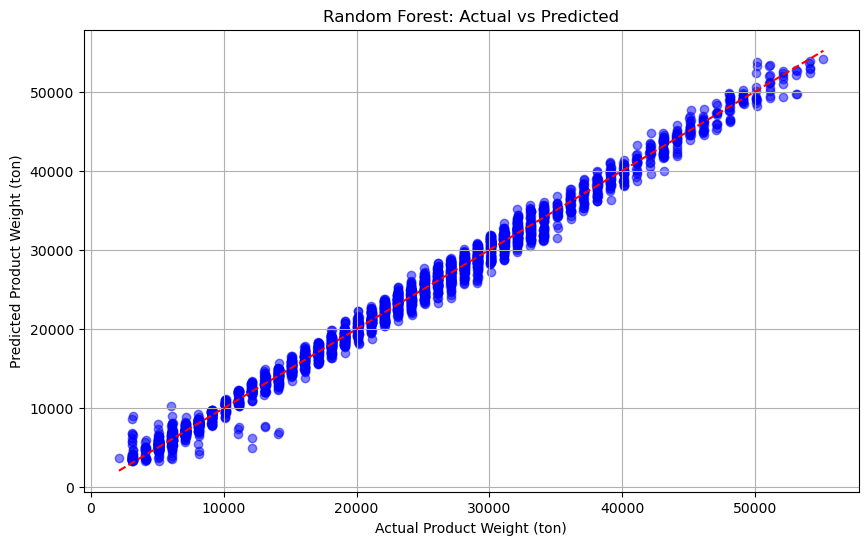

In [66]:
y_pred_rf = rf_model.predict(X_test)

# Plot actual versus predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Product Weight (ton)')
plt.ylabel('Predicted Product Weight (ton)')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)
plt.show()

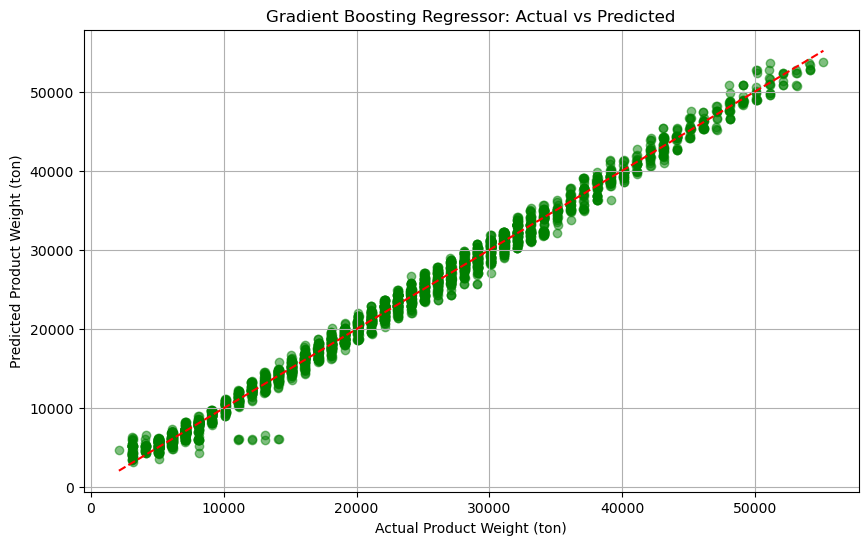

In [67]:

y_pred_gb = gb_model.predict(X_test)

# Plot actual versus predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Product Weight (ton)')
plt.ylabel('Predicted Product Weight (ton)')
plt.title('Gradient Boosting Regressor: Actual vs Predicted')
plt.grid(True)
plt.show()

This code will create a scatter plot comparing the actual product weight (ton) from the test dataset (y_test) with the predicted product weight (ton) generated by the Gradient Boosting Regressor model and Random Forest. Each point on the plot represents an observation, where the x-coordinate corresponds to the actual product weight and the y-coordinate corresponds to the predicted product weight.

Additionally, a red dashed line is plotted diagonally across the graph, representing the line where actual values are equal to predicted values. Points that fall close to this line indicate accurate predictions, while deviations from the line suggest discrepancies between actual and predicted values.

The purpose of this visualization is to assess the performance of the  Random Forest and Gradient Boosting Regressor model by visually inspecting how well the predicted values align with the actual values.

# Evaluation using Test dataset

In [68]:
Test_Dataset

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,116621,66621,0,0,1,4,5,0,3,5590,...,0,0,156,30,24,0,0,2,5,30132
1,116622,66622,0,0,1,4,5,0,2,5856,...,0,1,79,31,5,1,4,2,24,6075
2,116623,66623,0,2,1,5,3,0,3,4803,...,0,1,70,41,19,1,1,5,9,24076
3,116624,66624,0,1,3,3,5,2,2,4784,...,0,1,255,33,9,1,1,3,11,13092
4,116625,66625,1,1,1,3,6,0,4,3699,...,0,0,205,20,25,0,2,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,122145,72145,0,0,1,5,8,1,3,5030,...,0,1,203,28,22,1,1,2,4,29138
5525,122146,72146,0,2,2,5,3,1,3,4320,...,0,0,170,28,26,0,4,5,9,33108
5526,122147,72147,0,0,1,5,7,2,2,5268,...,0,0,99,22,20,0,3,6,4,24072
5527,122148,72148,0,0,1,5,6,2,4,4378,...,0,0,220,17,13,0,2,3,28,15055


In [70]:
# Extract features (X_test) and target variable (y_test) from the Test dataset
X_test = Test_Dataset.drop(columns=['product_wg_ton'])
y_test = Test_Dataset['product_wg_ton']

# Initialize regression models
models = {
    '1. Linear Regression': LinearRegression(),
    '2. Random Forest Regressor': RandomForestRegressor(),
    '3. Gradient Boosting Regressor': GradientBoostingRegressor(),
    '4. SVR': SVR(),
    '5. KNeighbors Regressor': KNeighborsRegressor()
}

# Iterate through each model
for name, model in models.items():
    # Fit the model to the Training dataset
    model.fit(X_train, y_train)
    
    # Make predictions on the Test dataset
    y_pred_test = model.predict(X_test)
    
    # Evaluate the model's performance on the Test dataset
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = model.score(X_test, y_test)
    
    # Print the model's score
    print(f"{name}:")
    print(f"Model Score: {model.score(X_test, y_test)}")
    print(f"Mean Squared Error (MSE): {mse_test}")
    print(f"Root Mean Squared Error (RMSE): {rmse_test}")
    print(f"R-squared: {r2_test}")
    print()

1. Linear Regression:
Model Score: 0.9770963932359935
Mean Squared Error (MSE): 3105699.1980005694
Root Mean Squared Error (RMSE): 1762.2994064575319
R-squared: 0.9770963932359935

2. Random Forest Regressor:
Model Score: 0.9927911590287903
Mean Squared Error (MSE): 977509.4313085912
Root Mean Squared Error (RMSE): 988.6907662705216
R-squared: 0.9927911590287903

3. Gradient Boosting Regressor:
Model Score: 0.9936107526677014
Mean Squared Error (MSE): 866373.6030838118
Root Mean Squared Error (RMSE): 930.7919225497242
R-squared: 0.9936107526677014

4. SVR:
Model Score: -1.980916250232667e-05
Mean Squared Error (MSE): 135601381.53356013
Root Mean Squared Error (RMSE): 11644.800622318964
R-squared: -1.980916250232667e-05

5. KNeighbors Regressor:
Model Score: -0.05683340229893363
Mean Squared Error (MSE): 143305230.64594683
Root Mean Squared Error (RMSE): 11971.016274566951
R-squared: -0.05683340229893363



#### Based on the results:

* Gradient Boosting Regressor performs the best among all models with the highest R-squared value (0.9936) and lowest RMSE (930.79).
* Linear Regression and Random Forest Regressor also perform well with high R-squared values (>0.977) and relatively low RMSE.
* SVR and KNeighbors Regressor perform poorly with negative R-squared values and high RMSE.

Therefore, the Gradient Boosting Regressor model seems to be the most suitable for predicting the optimum product weight, followed by Linear Regression and Random Forest Regressor. SVR and KNeighbors Regressor may not be appropriate for this particular task based on the given dataset.